<a href="https://colab.research.google.com/github/JGPB0/CS/blob/main/Lab5/CS_Lab5_ParedesJimmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trust and Digital Certificates

## Paredes Jimmy

## Exercise 1: Digital Certificate
From: Web link (Digital Certificate):
http://asecuritysite.com/encryption/digitalcert


### 1. Open up Certificate 1 and identify the following:
* Serial number: 702958

* Effective date: 4/24/2008 8:18:42 PM

* Name: CN=Fred Smith, OU=None, E=fred@home, O=Nowhere, L=Edinburgh, S=Lothian, C=GB

* Issuer: CN=Fred Smith, OU=None, E=fred@home, O=Nowhere, L=Edinburgh, S=Lothian, C=GB

* What is CN used for: It is the Common Name, which refers to the entity (person or organization) that the certificate is used to.

* What is ON used for: It is Organization Unit which represents the organization unit to which the subject belongs within an organization.

* What is O used for: It refers to the organization to which the subject belongs to.It identifies the legal entity associated with the certificate.

* What is L used for: L represents the locality or city where the subject is located. It's often used to specify the geographical location associated with the entity.

### 2. Now open-up the ZIP file for the certificate (Certificate 3), and view the DER file.

* What other information can you gain from the certificate:

* What is the size of the public key: The size of the public key depends on the curve used, in this case it is specified as NIST P-256 (secp256r1). Thus, the public key size is 256 bits.

* Which hashing method has been used: SHA-1.

* Is the certificate trusted on your system: **Yes**

### 3. Make a connection to the www.live.com Web site:
```
openssl s_client -connect www.live.com:443
```
* Can you identify the certificate chain?
Yes, it is possible to identify, in this case it is:
```
Certificate chain
 0 s:C = US, ST = Washington, L = Redmond, O = Microsoft Corporation, CN = outlook.live.com
   i:C = US, O = DigiCert Inc, CN = DigiCert Cloud Services CA-1
   a:PKEY: rsaEncryption, 2048 (bit); sigalg: RSA-SHA256
   v:NotBefore: Mar 10 00:00:00 2024 GMT; NotAfter: Mar 10 23:59:59 2025 GMT
 1 s:C = US, O = DigiCert Inc, CN = DigiCert Cloud Services CA-1
   i:C = US, O = DigiCert Inc, OU = www.digicert.com, CN = DigiCert Global Root CA
   a:PKEY: rsaEncryption, 2048 (bit); sigalg: RSA-SHA256
   v:NotBefore: Aug  4 12:00:00 2015 GMT; NotAfter: Aug  4 12:00:00 2030 GMT
```

* What is the subject on the certificate?
Microsoft Corporation.

* Who is the issuer on the certificate?
DigiCert Inc.


### 4. Google moved in July 2018 to mark sites as being insecure if they did not have a match between their digital certificate and the site. First open a browser and see if you can access testfire.net (you can try both https and http for the connection).

* Run a scan from https://www.ssllabs.com/ on testfire.net. What do you observe from the result?

  It returns the message: Certificate name mismatch.

* What is the SSLLabs rating on this site? Is it "A", "B", "C", "D", "E" or "F"? \\
  The SSLLabs rating is "T".

* What does a “T” rating identify? \\
  "T" rating identifies a server configuration as having a "Trust Store" issue. This means that the SSL/TLS server's certificate is not trusted by the client's trust store, which can lead to security warnings or errors when establishing a secure connection

* Can you locate another "T" rated site?
  Other "T" rated sites will be sites that uses a self-signed certificate.

### 5. Which the certificates in A.2, for Example 2 to Example 6. Complete the following table:



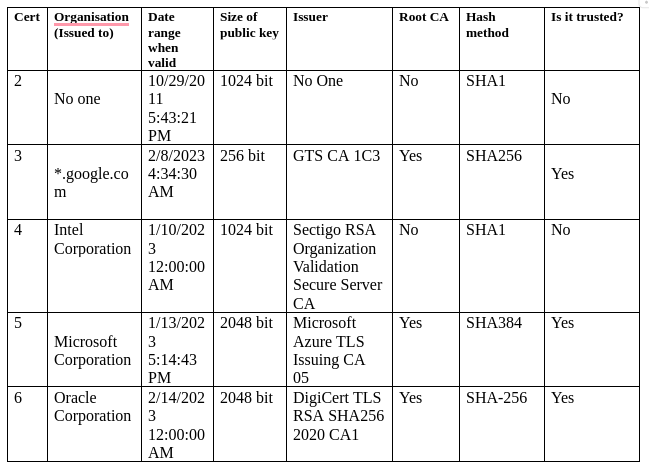


### Now download the DER files from: Web link (Digital Certificate): http://asecuritysite.com/der.zip

* Now use openssl to read the certificates:
openssl x509 -inform der -in [certname] -noout -text

## Exercise 2: Creating certificates

### 1. Create your own certificate from: Web link (Create Certificate): http://asecuritysite.com/encryption/createcert

Add in your own details.
View the certificate, and verify some of the details on the certificate.

* Can you view the DER file?

  No, it is not possible to see the DER file.

### 2. Create your RSA key pair with:
```
openssl genrsa -out ca.key 2048
```

Next create a self-signed root CA certificate ca.crt for My Global Corp:

```
openssl req -new -x509 -days 1826 -key ca.key -out ca.crt
```

* How many years will the certificate be valid for?
The certificate will be valid for 1826 days, which means 5 years.

* Which details have you entered:
I enter the country name, state or province name, locality name, organization name, organizational unit name, common name and email address.


### 3. Next go to Places, and from your Home folder, open up ca.crt and view the details of the certificate.

* Which Key Algorithm has been used: It was used an RSA key algorithm of 2048 bit.

* Which hashing methods have been used: SHA256.

* When does the certificate expire: Mar 22 16:25:42 2029 GMT

* Who is it verified by: My Global Corp

* Who has it been issued to: My Global Corp
and view the details of the certificate.

### 4. Next we will create a subordinate CA (My Little Corp), and which will be used for the signing of the certificate. First, generate the key:

```
openssl genrsa -out ia.key 2048
```

Next we will request a certificate for our newly created subordinate CA:
```
openssl req -new -key ia.key -out ia.csr
```
We can then create a certificate from the subordinate CA certificate and signed by the root CA.
```
openssl x509 -req -days 730 -in ia.csr -CA ca.crt -CAkey ca.key -set_serial 01 -out ia.crt
```

* View the newly created certificate.

* When does it expire: Mar 22 16:44:11 2026 GMT

* Who is the subject of the certificate: My Global Corp

* Which is their country: US

* Who signed the certificate: My Global Corp

* Which is their country: US

* What is the serial number of the certificate: 1 (0x1)

* Check the serial number for the root certificate. What is its serial number: serial=01, it was used the command line:

```
openssl x509 -in ia.crt -noout -serial
```

### 5. If we want to use this certificate to digitally sign files and verify the signatures, we need to convert it to a PKCS12 file:
```
openssl pkcs12 -export -out ia.p12 -inkey ia.key -in ia.crt -chain -CAfile ca.crt
```

* Can you view ia.p12 in a text edit? \\
  No, it is not possible.

### 6. The crt format is in encoded in binary. If we want to export to a Base64 format, we can use DER:
```
openssl x509 -inform pem -outform pem -in ca.crt -out ca.cer
```
and for My Little Corp:
```
openssl x509 -inform pem -outform pem -in ia.crt -out ia.cer
```

* View each of the output files in a text editor (ca.cer and then ia.cer). What can you observe from the format:
  The format of ia.cer and ca.cer is very similar but the ca.cer file contains more information.

* Which are the standard headers and footers used:
  In the header the information provided is
  * Identity: My Little Corp
  * Verified by: My Little Corp
  * Expires: 22/03/29
  while in the footers we have information:
  * Signature Algorithm:	1.2.840.113549.1.1.11
  * Signature Parameters:	05 00
  * Signature: (the signature)

### 7. Enter and run the following program, and verify its operation:
The code was modified to:

In [ ]:
import OpenSSL.crypto
from OpenSSL.crypto import load_certificate_request, FILETYPE_PEM


csr = '''-----BEGIN NEW CERTIFICATE REQUEST-----
MIICyTCCAbECAQAwajELMAkGA1UEBhMCVUsxDTALBgNVBAgTBE5vbmUxEjAQBgNV
BAcTCUVkaW5idXJnaDEXMBUGA1UEChMOTXkgTGl0dGxlIENvcnAxDDAKBgNVBAsT
A01MQzERMA8GA1UEAxMITUxDLm5vbmUwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAw
ggEKAoIBAQCuQE68qgssJ210wGxfKjCX3PG/RgSb5VpAp2rzavx71M9Bhg9kUORE
OP7BQC3E6DGu+xba3NdnhrHAFNa+hH9dnTZrlxb98aM5q9+TUm76V1toIseOMDdU
UE9IpxXoFvD6b0inbFZnbrjFj3XUUzIIqvvizw4rIOxzgbWqZ5+F7YpP8d59eWW0
6iXzJKoeE/+Gw7Slsdr1+QQAUaX05MHTweMYbZEHir2M8f1RA4o81zEd2tWCK85F
6VS/EkCzUG1cqDBQQ7D2S9MWN8Zk2P7CS8/yZx7uRTmT1t3UWKLUyIN0TU3IjCeY
t53P6C+9DT6UD0fDFZRBCmPOH+qb6/YBAgMBAAGgGjAYBgkqhkiG9w0BCQcxCxMJ
UXdlcnR5MTIzMA0GCSqGSIb3DQEBBQUAA4IBAQCqpXjmaQf2/o/xbNZG5ggAV8yV
d6rSabnov5zIkcit9NQXsPJEi84u7CbcriYqY5h7XlMWjv476mAGbgAVZB2ZhIlp
qLal+lx9xwhFbuLHNRxZcUMM0g9KQZaZTkAQdlDVU/vPzRjq+EHGoPfG7R9QKGD0
k1b4DqOvInWLOs+yuWT7YYtWdr2TNKPpcBqbzCYzrWL6UaUN7LYFpNn4BbqXRgVw
iMAnUh9fvLMe7oreYfTaevXT/506Sj9WvQFXTcLtRhs+M30q22/wUK0ZZ8APjpwf
rQMegvzXXEIO3xEGrBi5/wXJxsawRLcM3ZSGPu/Ws950oM5Ahn8K8HBdKubQ
-----END NEW CERTIFICATE REQUEST-----'''


req = load_certificate_request(FILETYPE_PEM, csr)
key = req.get_pubkey()
key_type = 'RSA' if key.type() == OpenSSL.crypto.TYPE_RSA else 'DSA'
subject = req.get_subject()
components = dict(subject.get_components())
print( "Key algorithm:", key_type)
print( "Key size:", key.bits())
print( "Common name:", components['CN'.encode()].decode())
print( "Organisation:", components['O'.encode()].decode())
print( "Organisational unit", components['OU'.encode()].decode())
print( "City/locality:", components['L'.encode()].decode())
print( "State/province:", components['ST'.encode()].decode())
print( "Country:", components['C'.encode()].decode())

Running the code above, the following result was obtained:
* Key algorithm: RSA
* Key size: 2048
* Common name: MLC.none
* Organisation: My Little Corp
* Organisational unit MLC
* City/locality: Edinburgh
* State/province: None
* Country: UK

### 8. Now check the signing on these certificate requests:
```
-----BEGIN NEW CERTIFICATE REQUEST-----
MIICyTCCAbECAQAwajELMAkGA1UEBhMCVUsxDTALBgNVBAgTBE5vbmUxEjAQBgNV
BAcTCUVkaW5idXJnaDEXMBUGA1UEChMOTXkgTGl0dGxlIENvcnAxDDAKBgNVBAsT
A01MQzERMA8GA1UEAxMITUxDLm5vbmUwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAw
ggEKAoIBAQCuQE68qgssJ210wGxfKjCX3PG/RgSb5VpAp2rzavx71M9Bhg9kUORE
OP7BQC3E6DGu+xba3NdnhrHAFNa+hH9dnTZrlxb98aM5q9+TUm76V1toIseOMDdU
UE9IpxXoFvD6b0inbFZnbrjFj3XUUzIIqvvizw4rIOxzgbWqZ5+F7YpP8d59eWW0
6iXzJKoeE/+Gw7Slsdr1+QQAUaX05MHTweMYbZEHir2M8f1RA4o81zEd2tWCK85F
6VS/EkCzUG1cqDBQQ7D2S9MWN8Zk2P7CS8/yZx7uRTmT1t3UWKLUyIN0TU3IjCeY
t53P6C+9DT6UD0fDFZRBCmPOH+qb6/YBAgMBAAGgGjAYBgkqhkiG9w0BCQcxCxMJ
UXdlcnR5MTIzMA0GCSqGSIb3DQEBBQUAA4IBAQCqpXjmaQf2/o/xbNZG5ggAV8yV
d6rSabnov5zIkcit9NQXsPJEi84u7CbcriYqY5h7XlMWjv476mAGbgAVZB2ZhIlp
qLal+lx9xwhFbuLHNRxZcUMM0g9KQZaZTkAQdlDVU/vPzRjq+EHGoPfG7R9QKGD0
k1b4DqOvInWLOs+yuWT7YYtWdr2TNKPpcBqbzCYzrWL6UaUN7LYFpNn4BbqXRgVw
iMAnUh9fvLMe7oreYfTaevXT/506Sj9WvQFXTcLtRhs+M30q22/wUK0ZZ8APjpwf
rQMegvzXXEIO3xEGrBi5/wXJxsawRLcM3ZSGPu/Ws950oM5Ahn8K8HBdKubQ
-----END NEW CERTIFICATE REQUEST-----

-----BEGIN NEW CERTIFICATE REQUEST-----
MIIDPzCCAqgCAQAwZDELMAkGA1UEBhMCQ04xCzAJBgNVBAgTAmJqMQswCQYDVQQH
EwJiajERMA8GA1UEChMIbXhjei5uZXQxETAPBgNVBAsTCG14Y3oubmV0MRUwEwYD
VQQDEwx3d3cubXhjei5uZXQwgZ8wDQYJKoZIhvcNAQEBBQADgY0AMIGJAoGBAMQ7
an4v6pHRusBA0prMWXMWJCXY1AO1H0X8pvZj96T5GWg++JPCQE9guPgGwlD02U0B
NDoEABeD1fwyKZ+JV5UFiOeSjO5sWrzIupdMI7hf34UaPNxHo6r4bLYEykw/Rnmb
GKnNcD4QlPkypE+mLR4p0bnHZhe3lOlNtgd6NpXbAgMBAAGgggGZMBoGCisGAQQB
gjcNAgMxDBYKNS4yLjM3OTAuMjB7BgorBgEEAYI3AgEOMW0wazAOBgNVHQ8BAf8E
BAMCBPAwRAYJKoZIhvcNAQkPBDcwNTAOBggqhkiG9w0DAgICAIAwDgYIKoZIhvcN
AwQCAgCAMAcGBSsOAwIHMAoGCCqGSIb3DQMHMBMGA1UdJQQMMAoGCCsGAQUFBwMB
MIH9BgorBgEEAYI3DQICMYHuMIHrAgEBHloATQBpAGMAcgBvAHMAbwBmAHQAIABS
AFMAQQAgAFMAQwBoAGEAbgBuAGUAbAAgAEMAcgB5AHAAdABvAGcAcgBhAHAAaABp
AGMAIABQAHIAbwB2AGkAZABlAHIDgYkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAADANBgkqhkiG9w0BAQUFAAOBgQBIKHVhHb9FZdVLV4VZ
9DK4aBSuYY//jlIpvsfMIdHXfAsuan7w7PH87asp1wdb6lD9snvLZix1UGK7VQg6
wUFYNlMqJh1m7ITVvzhjdnx7EzCKkBXSxEom4mwbvSNvzqOKAWsDE0gvHQ9aCSby
NFBQQMoW94LqrG/kuIQtjwVdZA==
-----END NEW CERTIFICATE REQUEST-----


-----BEGIN CERTIFICATE REQUEST-----
MIIByjCCATMCAQAwgYkxCzAJBgNVBAYTAlVTMRMwEQYDVQQIEwpDYWxpZm9ybmlh
MRYwFAYDVQQHEw1Nb3VudGFpbiBWaWV3MRMwEQYDVQQKEwpHb29nbGUgSW5jMR8w
HQYDVQQLExZJbmZvcm1hdGlvbiBUZWNobm9sb2d5MRcwFQYDVQQDEw53d3cuZ29v
Z2xlLmNvbTCBnzANBgkqhkiG9w0BAQEFAAOBjQAwgYkCgYEApZtYJCHJ4VpVXHfV
IlstQTlO4qC03hjX+ZkPyvdYd1Q4+qbAeTwXmCUKYHThVRd5aXSqlPzyIBwieMZr
WFlRQddZ1IzXAlVRDWwAo60KecqeAXnnUK+5fXoTI/UgWshre8tJ+x/TMHaQKR/J
cIWPhqaQhsJuzZbvAdGA80BLxdMCAwEAAaAAMA0GCSqGSIb3DQEBBQUAA4GBAIhl
4PvFq+e7ipARgI5ZM+GZx6mpCz44DTo0JkwfRDf+BtrsaC0q68eTf2XhYOsq4fkH
Q0uA0aVog3f5iJxCa3Hp5gxbJQ6zV6kJ0TEsuaaOhEko9sdpCoPOnRBm2i/XRD2D
6iNh8f8z0ShGsFqjDgFHyF3o+lUyj+UC6H1QW7bn
-----END CERTIFICATE REQUEST-----

```

* What are the details on the requests?

First and second certificates are certificate request (CSR) encoded in the PEM format, both contains information about the subject's distinguished name (DN), public key, and signature. While the third certificate is a certificate request encoded in the PEM format and like the previous requests, it contains information about the subject's distinguished name, public key, and signature.


## Exercise 3:  Elliptic Curve Key Creation


In Openssl we can view the curves with the ecparam option:

```
openssl ecparam -list_curves
```

* Outline some of the curve names:
  * secp112r1: SECG curve over a 112-bit prime field.
  * secp112r2: SECG curve over a 112-bit prime field.
  * secp128r1: SECG curve over a 128-bit prime field.
  * secp128r2: SECG curve over a 128-bit prime field.
  * secp160k1: SECG curve over a 160-bit prime field.

* By performing an Internet search, which are the most popular curves (and where are they used)?

  * secp256r1 (also known as prime256v1 or P-256): This curve is defined by the SECG (Standards for Efficient Cryptography Group) and is widely used in various cryptographic protocols and standards, including TLS (Transport Layer Security) for securing internet communications, PGP (Pretty Good Privacy) for email encryption, and Bitcoin for digital signatures.
  
  * secp384r1 (also known as P-384): Another curve defined by the SECG, secp384r1 offers higher security with its larger key size compared to secp256r1. It is used in applications that require stronger cryptographic security, such as certain government and military systems.

  * secp521r1 (also known as P-521): This curve is the largest of the NIST (National Institute of Standards and Technology) standardized curves and provides very high security due to its large key size. It is used in applications where maximum security is required, such as digital signatures for high-assurance systems and cryptographic key generation.

* We can create our elliptic parameter file with:
```
openssl ecparam -name secp256k1 -out secp256k1.pem
```

* Now view the details with:
```
openssl ecparam -in secp256k1.pem -text -param_enc explicit -noout
```

* What are the details of the key?
  The details are:
  * EC-Parameters: (256 bit)
  * Field Type: prime-field
  * Prime: The prime number used in hex.
  * A:    0
  * B:    7 (0x7)
  * Generator (uncompressed)
  * Order
  * Cofactor:  1 (0x1)

* Now we can create our key pair:
```
openssl ecparam -in secp256k1.pem -genkey -noout -out mykey.pem
```

* Now we will encrypt your key pair (and add a password), and convert it into a format which is ready to be converted into a digital certificate:
```
openssl ec -aes-128-cbc -in mykey.pem -out enckey.pem
```

* Finally we will convert into a DER format, so that we can import the keys into a system:
```
openssl ec -in enckey.pem -outform DER -out enckey.der
```

* Examine each of the files created and outline what they contain:
  * mykey.pem: contains the private key.
  * enckey.pem: contains the encrypted private key.
  * enckey.der: it is not possible to see the content of this file, or the content to visualize is in a format to not be readable by a human. It will have to contain the encrypted key in a DER format.

## Exercise 4: Key Establishment

Imagine a peer-to-peer network where 1000 users want to communicate in an  authenticated and confidential way without a central Trusted Third Party (TTP).  

* How many keys are collectively needed, if symmetric algorithms are deployed?  
In this case, every user needs a unique key to commmunicate with every other user. So, each user will need 999 keys, Thus, the total number of keys are 1000 * 999 = 999000.

* How are these numbers changed, if we bring in a central instance (Key Distribution Center, KDC)?  
In this escenario, each user needs only one key to communicate, but the KDC needsa unique key for each user to communicate with. So, the total number of keys are: 1000 + 1000 = 2000.

* What is the main advantage of a KDC against the scenario without a KDC?  
The main advantage is key distribution efficiency. As it was seen before, if we do not use KDC, the number of keys needed grows in a quadratic way, but using KDC this is dramatically reduced making its management more efficient.

* How many keys are necessary if we make use of asymmetric algorithms?
When using Asymmetric algorithms, each user has a pair of keys (public key and private key). But, the number of keys remains the same because each user still needs to communicate with every other user. So, the total number of keys needed is 999000.

Also differentiate between keys which every user has to store and keys which are  collectively necessary.


## Exercise 5:  PFX files

### 1. We will now view some PFX certificate files, and which are protected with a password: Web link (Digital Certificates): http://asecuritysite.com/encryption/digitalcert2

* For Certificate 1, can you open it in the Web browser with an incorrect password: \\
No, it is not possible using the certificate 1.

* Now enter “apples” as a password, and record some of the key details of the certificate:
  * Algorithm:	RSA
  * Size:	1024
  * Fingerprints
    * SHA1:	FD A3 BD 47 9D D3 08 C1 8B EE 53 81 48 36 0B E7 94 57 E5 81
    * SHA256:	5A 9C 36 A3 F9 71 27 71 6C 41 0A 6E 88 74 CF 17 20 D8 5A 61 CE A8 76 FA 6D 01 08 CA 94 9E E3 51


* Now repeat for Certificate 2:
It is not possible to open the certificate ising an incorrect password, then it was used the password "battery", some datails from the key are:
  * Algorithm:	RSA
  * Size:	1024
  * Fingerprints
    * SHA1:	78 C7 04 32 EF 77 42 46 08 02 CC 55 9C 32 9C B5 79 6C 94 86
    * SHA256:	BE 0E 57 63 AF D6 15 81 9F 44 20 D5 50 BF 42 CE A0 41 DE 99 64 BD C9 1C 77 EF 1E 58 6C DF 0A 55


### 2. Now with the PFX files (contained in the ZIP files from the Web site), try and import them onto your computer. Try to enter an incorrect password first and observe the message.

* Was the import successful? \\
No, it was not successful, the message obtained was: "Mac verify error: invalid password?"

* If successful, outline some of the details of the certificates: \\
It was not successful.

## Exercise 6: Cracking Certificates

### 1. Digital certificates are often protected with a simple password. With this we can use a Python program to try various passwords on the certificate, and if it does not create an exception, then we have found the required password. First download the following pfx files: https://asecuritysite.com/cert_crack.zip

* Now for fred.pfx, crack the password with the following code:


What is the password?

The files bill01.pfx, bill02.pfx … bill18.pfx have a password which are fruits. Can you determine the fruits used:

The files country01.pfx, country02.pfx … country06.pfx have a password which are countries. Can you determine the countries used:


It was not possible to perform those tasks becase the ```pyOpenSSL.crypto.load_pkcs12``` is now deprecated.

## Exercise 7: Setting up a certificate on a Web site

### 1. Now we will enable HTTPs on an Apache Web Server, and install a digital certificate. Execute the following commands:

```
sudo a2enmod ssl
service apache2 restart
openssl genrsa -out ca.key 2048
sudo openssl req -nodes -new -key ca.key -out ca.csr
sudo openssl x509 -req -days 365 -in ca.csr -signkey ca.key -out ca.crt
sudo mkdir /etc/apache2/ssl
sudo cp ca.crt ca.key ca.csr /etc/apache2/ssl/
sudo nano /etc/apache2/sites-enabled/000-default.conf
sudo /etc/init.d/apache2 restart
```

HTTPs should now be enabled with a self-signed certificate. If you try https://localhost, you will have to add an exception to view the page, as we are using a self-signed certificate:



In the /etc/apache2/sites-enabled/000-default.conf the following lines of code were added:
```
<VirtualHost *:443>
    ServerName example.com
    DocumentRoot /var/www/html

    SSLEngine on
    SSLCertificateFile /etc/apache2/ssl/ca.crt
    SSLCertificateKeyFile /etc/apache2/ssl/ca.key

    # Other SSL configuration directives can be added here

    ErrorLog ${APACHE_LOG_DIR}/error.log
    CustomLog ${APACHE_LOG_DIR}/access.log combined
</VirtualHost>

```
And the result is the following:



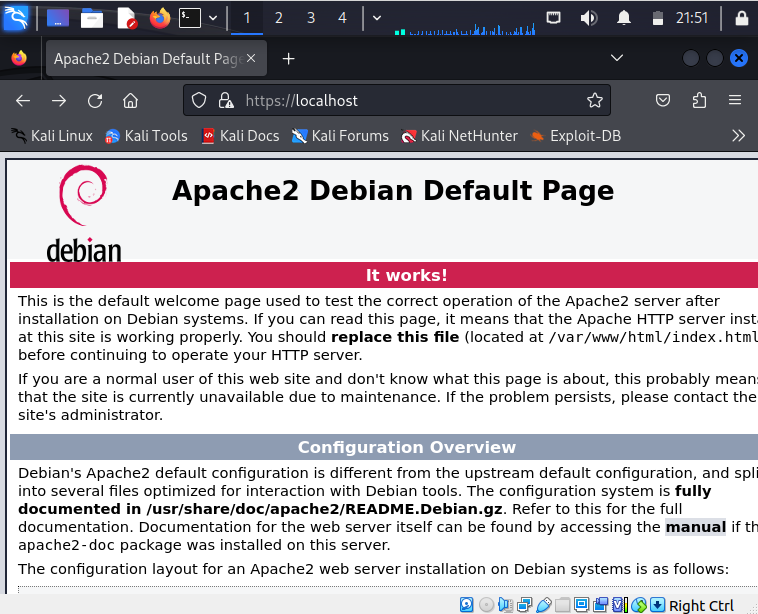